# <h1><center> COMMUNICATION THROUGH DATA and STORY THROUGH VISUALIZATION </center></h1>

## Models 

### Meenakshi Nerolu           
### Date: Nov 18, 2020

# Importing Libraries

In [1]:
## import packages:
import numpy as np # for vector operations
from numpy import percentile
import pandas as pd # for Data Frame methods
import matplotlib.pyplot as plt # Two dimensional plotting library
import matplotlib as mpl
import seaborn as sns #  library for making statistical graphics
import plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.express as px
from plotly import tools

# 1.Traffic Violation <a class="anchor" id="sec3"></a> 

## Reading "Traffic_Violations" data

In [2]:
    # Reading csv file
    #traffic = pd.read_csv("Traffic_Violations.csv",low_memory=False)
    
    ## Downloading & Reading csv file from website
    url = 'https://data.montgomerycountymd.gov/api/views/4mse-ku6q/rows.csv?accessType=DOWNLOAD'
    traffic = pd.read_csv(url,low_memory=False)

In [3]:
"""" UseFeatues() Function when called, returns a dataframe with additional features"""

def useFeatures(traffic):

    ## Formatting the Date
    ## Replace white space everywhere
    traffic.columns = traffic.columns.str.replace(' ', '')
    # Confirm the date column is in datetime format
    traffic['DateOfStop'] = pd.to_datetime(traffic['DateOfStop'])

    # Confirm the  time column is in datetime format
    traffic['TimeOfStop'] = pd.to_datetime(traffic['TimeOfStop'])
    # creating  new columns: date, year, month, day, time 
    traffic['date'] = pd.to_datetime(traffic['DateOfStop'])
    traffic['year'] = traffic['DateOfStop'].dt.year
    traffic['month'] = traffic['DateOfStop'].dt.month
    traffic['time'] = traffic['TimeOfStop'].dt.time
    traffic['hour'] = traffic['TimeOfStop'].dt.hour
    traffic['day'] = traffic['DateOfStop'].dt.weekday_name
    
    traffic = traffic.sort_values(by='date')
    

    
    ## Filtering the Desired Date Range - 2015 to 2020 ##
    traffic = traffic[traffic.date >='01/01/2015']
    traffic = traffic[traffic.date <'11/10/2020']
    traffic = traffic.reset_index(drop=True)
    
    traffic['season']= "Fall"
    traffic.loc[(traffic['month'] < 3) | (traffic['month'] >= 12), "season"] = 'Winter'
    traffic.loc[(traffic['month'] < 6) & (traffic['month'] >= 3), "season"] = 'Spring'
    traffic.loc[(traffic['month'] < 9) & (traffic['month'] >= 6), "season"] = 'Summer'
    
    ## Hour status
    ##traffic["hourStatus"] = "Evening"
    ## traffic.loc[( traffic["hour"] < 18) & ( traffic["wdayStatus"] == "Weekday"), "hourStatus"]="WorkHour"
    
    #Creating a new column to count the total number of violation
    traffic['Violation'] = pd.Series(1, index=traffic.index)
    
    return traffic

In [4]:
# All the above features are stored in new data frame "traffic_features"
traffic_features = useFeatures(traffic)

In [5]:
traffic_features.head()

,SeqID,DateOfStop,TimeOfStop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,...,ArrestType,Geolocation,date,year,month,time,hour,day,season,Violation
0,dba88e3c-d986-463d-af3c-2387570116f6,2015-01-01,2020-11-18 10:48:00,MCP,"3rd District, Silver Spring",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,UNIVERSITY BLVD @ E FRANKLIN AVE,39.004040,-76.996607,No,...,A - Marked Patrol,"(39.00404, -76.9966066666667)",2015-01-01,2015,1,10:48:00,10,Thursday,Winter,1
1,88f3b9bf-3b96-4532-8431-387c9a8b2dbe,2015-01-01,2020-11-18 18:04:00,MCP,"4th District, Wheaton",FAILURE TO DISPLAY REGISTRATION CARD UPON DEMA...,UNIVERSITY BLVD W/VEIRS MILL RD,39.040385,-77.054823,No,...,A - Marked Patrol,"(39.040385, -77.0548233333333)",2015-01-01,2015,1,18:04:00,18,Thursday,Winter,1
2,7f9d9aec-3c7c-4650-8a4e-daf908ef4269,2015-01-01,2020-11-18 00:48:00,MCP,"3rd District, Silver Spring",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,RANDOLPH RD @ VEIRS MILL RD,39.055035,-77.084118,No,...,A - Marked Patrol,"(39.055035, -77.0841183333333)",2015-01-01,2015,1,00:48:00,0,Thursday,Winter,1
3,f00e6050-4607-42c3-86f7-f9eca6d8db53,2015-01-01,2020-11-18 22:01:00,MCP,"2nd District, Bethesda",FAILURE TO STOP AT STOP SIGN,MACARTHUR BLVD AND OBERLIN AVE,38.962597,-77.134805,No,...,A - Marked Patrol,"(38.9625966666667, -77.134805)",2015-01-01,2015,1,22:01:00,22,Thursday,Winter,1
4,036f6aeb-6c1e-4953-9ca1-ce6cf3b0da4f,2015-01-01,2020-11-18 02:50:00,MCP,Headquarters and Special Operations,PERSON DRIVING MOTOR VEHICLE WHILE LICENSE SUS...,WISCONSIN AND CHELSEA LN,39.149900,-77.233578,No,...,A - Marked Patrol,"(39.1499, -77.2335783333333)",2015-01-01,2015,1,02:50:00,2,Thursday,Winter,1


## Replace Yes or No by 0 

In [6]:
    ## Replace Yes and No by 1 and 0 respectively
traffic_replace = traffic_features.replace( {'Yes' : 1, 'No' : 0})
    
   
    ## replace the column name Year by Year_model
traffic_replace = traffic_replace.rename(columns={"Year":"Year_model"})
    
    # Delete the following columns as these columns have the highest number of NA's
delete_columns = traffic_replace[['SeqID', 'SearchConducted', 'SearchDisposition', 'SearchOutcome' , 'SearchReason', 'SearchReasonForStop', 'SearchType', 'SearchArrestReason']]
    
    # Delete these columns from the data frame, traffic_new
traffic_new = traffic_replace.drop(delete_columns ,axis=1)

In [7]:
traffic_new["Color"].value_counts()

BLACK          239044
SILVER         206446
WHITE          182195
GRAY           136455
RED             84999
BLUE            80429
GREEN           31513
GOLD            30863
BLUE, DARK      24025
TAN             19406
MAROON          17398
BLUE, LIGHT     13184
BEIGE           10980
GREEN, DK        9629
GREEN, LGT       5314
BROWN            4667
YELLOW           3965
ORANGE           3712
BRONZE           2406
PURPLE           1942
MULTICOLOR        757
CREAM             545
COPPER            346
PINK              143
CHROME             30
CAMOUFLAGE         26
Name: Color, dtype: int64

In [8]:
#rename the colors :
traffic_new = traffic_new.replace({"BLUE, DARK":"BLUE" , "BLUE, LIGHT":"BLUE", "GREEN, DK":"GREEN", "GREEN, LGT":"GREEN" })
traffic_new.head()
print("Size of the data frame : ", traffic_new.shape)
#info() is used to check the Information about the data and the datatypes of each respective attribute.
print("Summary of columns ", traffic_new.info(verbose = False))
#This code prints a summary of columns count and its dtypes but not per column information.
print("\n\nThe column names in the dataframe \n\n :", traffic_new.columns)

Size of the data frame :  (1121973, 43)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1121973 entries, 0 to 1121972
Columns: 43 entries, DateOfStop to Violation
dtypes: bool(1), datetime64[ns](3), float64(3), int64(14), object(22)
memory usage: 360.6+ MB
Summary of columns  None


The column names in the dataframe 

 : Index(['DateOfStop', 'TimeOfStop', 'Agency', 'SubAgency', 'Description',
       'Location', 'Latitude', 'Longitude', 'Accident', 'Belts',
       'PersonalInjury', 'PropertyDamage', 'Fatal', 'CommercialLicense',
       'HAZMAT', 'CommercialVehicle', 'Alcohol', 'WorkZone', 'State',
       'VehicleType', 'Year_model', 'Make', 'Model', 'Color', 'ViolationType',
       'Charge', 'Article', 'ContributedToAccident', 'Race', 'Gender',
       'DriverCity', 'DriverState', 'DLState', 'ArrestType', 'Geolocation',
       'date', 'year', 'month', 'time', 'hour', 'day', 'season', 'Violation'],
      dtype='object')


In [9]:
traffic_final = traffic_new.fillna(method='ffill')

In [10]:
traffic_final.head()

,DateOfStop,TimeOfStop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,...,ArrestType,Geolocation,date,year,month,time,hour,day,season,Violation
0,2015-01-01,2020-11-18 10:48:00,MCP,"3rd District, Silver Spring",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,UNIVERSITY BLVD @ E FRANKLIN AVE,39.004040,-76.996607,0,0,...,A - Marked Patrol,"(39.00404, -76.9966066666667)",2015-01-01,2015,1,10:48:00,10,Thursday,Winter,1
1,2015-01-01,2020-11-18 18:04:00,MCP,"4th District, Wheaton",FAILURE TO DISPLAY REGISTRATION CARD UPON DEMA...,UNIVERSITY BLVD W/VEIRS MILL RD,39.040385,-77.054823,0,0,...,A - Marked Patrol,"(39.040385, -77.0548233333333)",2015-01-01,2015,1,18:04:00,18,Thursday,Winter,1
2,2015-01-01,2020-11-18 00:48:00,MCP,"3rd District, Silver Spring",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,RANDOLPH RD @ VEIRS MILL RD,39.055035,-77.084118,0,0,...,A - Marked Patrol,"(39.055035, -77.0841183333333)",2015-01-01,2015,1,00:48:00,0,Thursday,Winter,1
3,2015-01-01,2020-11-18 22:01:00,MCP,"2nd District, Bethesda",FAILURE TO STOP AT STOP SIGN,MACARTHUR BLVD AND OBERLIN AVE,38.962597,-77.134805,0,0,...,A - Marked Patrol,"(38.9625966666667, -77.134805)",2015-01-01,2015,1,22:01:00,22,Thursday,Winter,1
4,2015-01-01,2020-11-18 02:50:00,MCP,Headquarters and Special Operations,PERSON DRIVING MOTOR VEHICLE WHILE LICENSE SUS...,WISCONSIN AND CHELSEA LN,39.149900,-77.233578,0,0,...,A - Marked Patrol,"(39.1499, -77.2335783333333)",2015-01-01,2015,1,02:50:00,2,Thursday,Winter,1


In [11]:
#traffic_new[obj_traffic_new]=traffic_new[obj_traffic_new].fillna("other")
#traffic_new = traffic_new.fillna("")
#traffic_new.head()

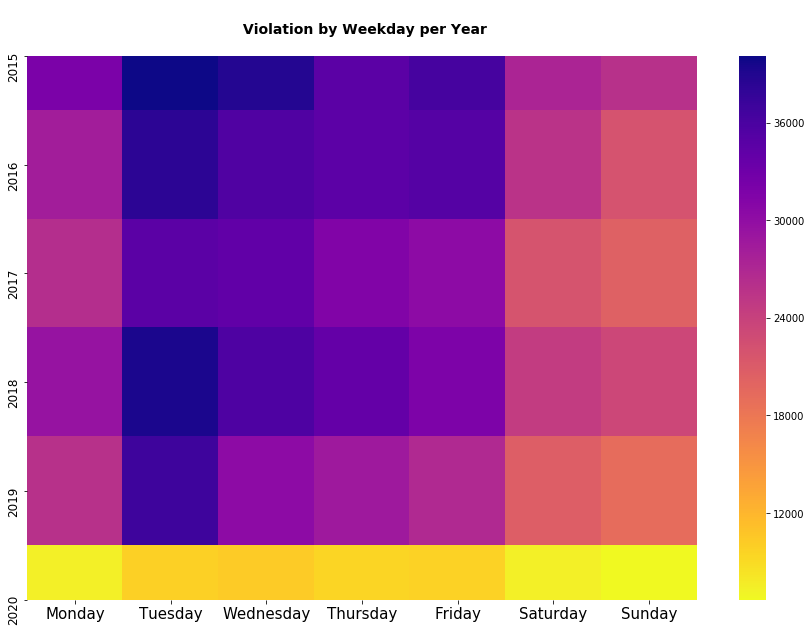

In [12]:
weekdays = ['Monday', 'Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
violationweekday = traffic_final.groupby(['year', 'day']).size()
#Reshape using unstack() function in Pandas python: 
violationweekday = violationweekday.rename_axis(['year', 'day'])\
                               .unstack('day')\
                               .reindex(columns=weekdays)
plt.figure(figsize=(15,10))
sns.heatmap(violationweekday, cmap='plasma_r')
plt.title('\n Violation by Weekday per Year\n', fontsize=14, fontweight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.ylabel('')
plt.savefig('images/violationsbyweekdayperyear.jpg')
plt.show()

# Time Series Decomposition Plot (Traffic Violation)

In [13]:
import time
import datetime 
import dateutil
import statsmodels.api as sm
from dateutil.parser import parse
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [14]:
traffic_timeseries=traffic_final.copy()
#CRI_timeseries['date'] = CRI_timeseries['date'].astype(str)
traffic_timeseries['date'] = pd.to_datetime(traffic_timeseries['date'])
#CRI_timeseries_columns=CRI_timeseries[['']]
#dates = pd.DatetimeIndex([parse(d).strftime('%Y-%m-01') for d in CRI_timeseries['date']])
traffic_timeseries=traffic_timeseries.set_index('date')

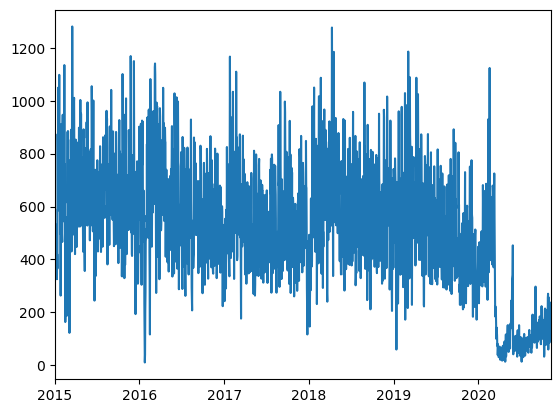

In [15]:
plt.rcdefaults()
violation_per_day=traffic_timeseries['Violation'].groupby(traffic_timeseries.index.date).sum()
violation_per_day.plot()
plt.show()

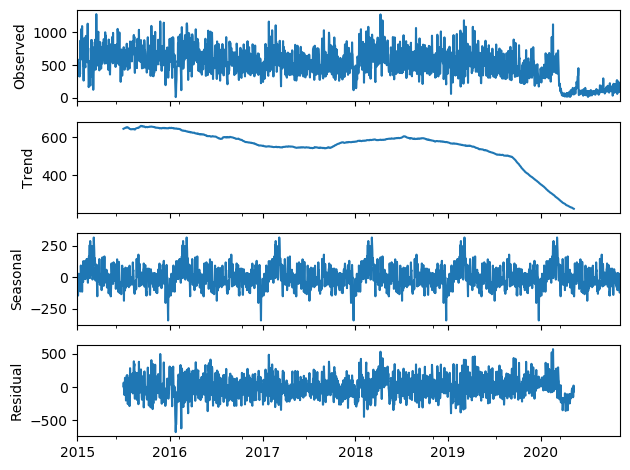

In [16]:
res = seasonal_decompose(violation_per_day, freq=365, model= 'additive')
res.plot()
plt.show()
#resplot = res.plot()
#resplot.savefig('Seasonal_Decompose.png', dpi=150)

# Machine Learning (Traffic Violation)

We will be looking at different columns to figure out predicting about the Citation Type. 

In [17]:
#CRNM_ML = CRNM_new.replace({'InjurySeverity' : {'SUSPECTED MINOR INJURY' : 'SUSPECTED_M_INJURY' , 'POSSIBLE INJURY': 'POSSIBLE_INJURY', 'SUSPECTED SERIOUS INJURY' : 'SUSPECTED_S_INJURY', 'NO APPARENT INJURY' : 'NO_APPARENT_INJURY','FATAL INJURY' : 'FATAL_INJURY' }})
traffic_ML = traffic_final.copy()
traffic_ML.head()

,DateOfStop,TimeOfStop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,...,ArrestType,Geolocation,date,year,month,time,hour,day,season,Violation
0,2015-01-01,2020-11-18 10:48:00,MCP,"3rd District, Silver Spring",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,UNIVERSITY BLVD @ E FRANKLIN AVE,39.004040,-76.996607,0,0,...,A - Marked Patrol,"(39.00404, -76.9966066666667)",2015-01-01,2015,1,10:48:00,10,Thursday,Winter,1
1,2015-01-01,2020-11-18 18:04:00,MCP,"4th District, Wheaton",FAILURE TO DISPLAY REGISTRATION CARD UPON DEMA...,UNIVERSITY BLVD W/VEIRS MILL RD,39.040385,-77.054823,0,0,...,A - Marked Patrol,"(39.040385, -77.0548233333333)",2015-01-01,2015,1,18:04:00,18,Thursday,Winter,1
2,2015-01-01,2020-11-18 00:48:00,MCP,"3rd District, Silver Spring",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,RANDOLPH RD @ VEIRS MILL RD,39.055035,-77.084118,0,0,...,A - Marked Patrol,"(39.055035, -77.0841183333333)",2015-01-01,2015,1,00:48:00,0,Thursday,Winter,1
3,2015-01-01,2020-11-18 22:01:00,MCP,"2nd District, Bethesda",FAILURE TO STOP AT STOP SIGN,MACARTHUR BLVD AND OBERLIN AVE,38.962597,-77.134805,0,0,...,A - Marked Patrol,"(38.9625966666667, -77.134805)",2015-01-01,2015,1,22:01:00,22,Thursday,Winter,1
4,2015-01-01,2020-11-18 02:50:00,MCP,Headquarters and Special Operations,PERSON DRIVING MOTOR VEHICLE WHILE LICENSE SUS...,WISCONSIN AND CHELSEA LN,39.149900,-77.233578,0,0,...,A - Marked Patrol,"(39.1499, -77.2335783333333)",2015-01-01,2015,1,02:50:00,2,Thursday,Winter,1


In [18]:
traffic_ML.columns

Index(['DateOfStop', 'TimeOfStop', 'Agency', 'SubAgency', 'Description',
       'Location', 'Latitude', 'Longitude', 'Accident', 'Belts',
       'PersonalInjury', 'PropertyDamage', 'Fatal', 'CommercialLicense',
       'HAZMAT', 'CommercialVehicle', 'Alcohol', 'WorkZone', 'State',
       'VehicleType', 'Year_model', 'Make', 'Model', 'Color', 'ViolationType',
       'Charge', 'Article', 'ContributedToAccident', 'Race', 'Gender',
       'DriverCity', 'DriverState', 'DLState', 'ArrestType', 'Geolocation',
       'date', 'year', 'month', 'time', 'hour', 'day', 'season', 'Violation'],
      dtype='object')

In [19]:
violtype_ml = traffic_ML.drop('ViolationType' ,axis=1)

In [20]:
violtype_ml = violtype_ml[['Accident', 'Belts','PersonalInjury', 'PropertyDamage', 'Fatal', 'CommercialLicense',
                            'HAZMAT', 'CommercialVehicle', 'Alcohol', 'WorkZone', 'year', 'hour'
                          ]]

In [21]:
violtype_ml.head()

,Accident,Belts,PersonalInjury,PropertyDamage,Fatal,CommercialLicense,HAZMAT,CommercialVehicle,Alcohol,WorkZone,year,hour
0,0,0,0,0,0,0,0,0,0,0,2015,10
1,0,0,0,0,0,0,0,0,0,0,2015,18
2,0,0,0,0,0,0,0,0,0,0,2015,0
3,0,0,0,0,0,0,0,0,0,0,2015,22
4,0,0,0,0,0,0,0,0,0,0,2015,2


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import log_loss
# Split the data into a training and test set.
#X_train, X_test, y_train, y_test = train_test_split(accident_ml.values, 
                                              #CRNM_ML['InjurySeverity'].values,test_size=0.20, random_state=99)
features = violtype_ml
target = traffic_final['ViolationType']
X_train, X_test, y_train, y_test = train_test_split(features,target  
                                             ,test_size=0.20, random_state=99)
print("done")

done


In [23]:
print ('Shape of X:', features.shape)
print ('Shape of y:', target.shape)
print ('Shape of X_train:', X_train.shape)
print ('Shape of y_train:', y_train.shape)
print ('Shape of X_test:', X_test.shape)
print ('Shape of y_test:', y_test.shape)

Shape of X: (1121973, 12)
Shape of y: (1121973,)
Shape of X_train: (897578, 12)
Shape of y_train: (897578,)
Shape of X_test: (224395, 12)
Shape of y_test: (224395,)


# Logistic Regression

In [ ]:
# import the class
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
## fit the model with data
logmodel.fit(X_train, y_train)
y_pred = logmodel.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#print("ROC score",roc_auc_score(y_test, y_pred))
#print("F1 score",f1_score(y_test, y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



In [29]:
print('Accuracy1 :',logmodel.score(X_train,y_train))
print('Accuracy2 :',logmodel.score(X_test,y_test))

Accuracy1 : 0.572646611213733
Accuracy2 : 0.5744156509726153


## Model Evaluation using Confusion Matrix

In [27]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



              precision    recall  f1-score   support

    Citation       0.63      0.19      0.29     92579
       ESERO       0.00      0.00      0.00     10600
     Warning       0.57      0.92      0.70    121216

    accuracy                           0.57    224395
   macro avg       0.40      0.37      0.33    224395
weighted avg       0.56      0.57      0.50    224395

[[ 17149      0  75430]
 [   791      0   9809]
 [  9469      0 111747]]
0.5744156509726153


# Random Forest

In [30]:
#import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
random_forest = RandomForestClassifier(n_estimators=200)
random_forest.fit(X_train,y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_test, y_test)
acc_random_forest1 = round(random_forest.score(X_test, y_test) * 100, 2)

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy" , acc_random_forest1)
print(sk_report)
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 59.98
              precision    recall  f1-score   support

    Citation   0.667697  0.268301  0.382786     92579
       ESERO   0.000000  0.000000  0.000000     10600
     Warning   0.586349  0.905475  0.711778    121216

    accuracy                       0.599822    224395
   macro avg   0.418015  0.391258  0.364855    224395
weighted avg   0.592213  0.599822  0.542422    224395



Predicted,Citation,ESERO,Warning,All
Actual,,,,
Citation,24839,2,67738,92579
ESERO,907,0,9693,10600
Warning,11455,3,109758,121216
All,37201,5,187189,224395
